<a href="https://colab.research.google.com/github/MdJuwelSarker/Personal/blob/main/adv_matrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Predicting Suicide Ideation Using Machine Learning Algorithem**

  **<h2>1. Introduction**

The mental health of university students in Bangladesh has become a serious
concern, especially after the Covid-19 period. The pandemic exacerbated most of the pre-existing problems that cause damage to mental health. In recent years, both suicidal attempts and suicide deaths have increased significantly among public university students. However, mental health is an ignored issue in Bangladesh, and there is a knowledge gap regarding mental health of university students. This research explores causal factors of depression, anxiety, and stress among university students using mixed-method research. The researcher utilized quantitative research tools such as survey questionnaires and linear regression models to measure causal factors and qualitative research methods to unveil the breaking point of suicide. To delve into the emotional state of the suicide-attempted respondents, the research conducted in-depth interviews and life trajectory analysis. Trouble in an affair, severe economic crisis, and withdrawal from close people are the critical factors associated with suicidal attempts or suicide. Being female, having tension in parental relationships, doing less or no exercise, high internet use, outing less per week, and having economic crises have a strong connection with depression, anxiety, and stress. This research recommends establishing professional mental health counselling facilities, fitness centers and regular sports activities in every university of Bangladesh.  

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**<h1>Importing Dataset**

In [229]:
df = pd.read_csv('/content/MentalHealth_ML_12_7_24.csv')
df.head()

,DASS1,DASS2,DASS3,DASS4,DASS5,DASS6,DASS7,DASS8,DASS9,DASS10,...,Relationship_Crisis,Career_Uncertainty,Gender,Age,relationship_status,Religion,Academic_Year,STEM,Academic_Result,Rural
0,2.0,3.0,1.0,2.0,1.0,3.0,0.0,2.0,3.0,3.0,...,2.0,3.0,0.0,25.0,Have affair,Islam,8.0,0.0,3.420,0.0
1,3.0,1.0,2.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,...,0.0,3.0,1.0,26.0,Have affair,Islam,9.0,0.0,3.405,1.0
2,2.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,2.0,2.0,...,3.0,3.0,1.0,22.0,Have affair,Islam,4.0,0.0,3.340,1.0
3,3.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,0.0,21.0,Single,Islam,4.0,0.0,3.600,0.0
4,2.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,2.0,1.0,23.0,Single,Hinduism,5.0,1.0,2.900,0.0


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DASS1                 683 non-null    float64
 1   DASS2                 683 non-null    float64
 2   DASS3                 683 non-null    float64
 3   DASS4                 683 non-null    float64
 4   DASS5                 683 non-null    float64
 5   DASS6                 683 non-null    float64
 6   DASS7                 682 non-null    float64
 7   DASS8                 683 non-null    float64
 8   DASS9                 683 non-null    float64
 9   DASS10                683 non-null    float64
 10  DASS11                683 non-null    float64
 11  DASS12                683 non-null    float64
 12  DASS13                683 non-null    float64
 13  DASS14                683 non-null    float64
 14  DASS15                683 non-null    float64
 15  DASS16                6

In [231]:
df.describe()

,DASS1,DASS2,DASS3,DASS4,DASS5,DASS6,DASS7,DASS8,DASS9,DASS10,...,Low_Religiosity,Academic_Pressure,Relationship_Crisis,Career_Uncertainty,Gender,Age,Academic_Year,STEM,Academic_Result,Rural
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,682.000000,683.000000,683.000000,683.000000,...,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,548.000000,683.000000
mean,1.322108,1.125915,1.067350,1.021962,1.383602,1.374817,1.197947,1.401171,1.349927,1.386530,...,1.073206,1.544656,0.831625,1.833089,0.544656,22.902635,5.016105,0.546120,3.332356,0.598829
std,0.965031,0.941991,1.032395,1.047739,1.038480,1.024657,1.064910,1.072229,1.049625,1.120298,...,0.933523,1.017002,1.082815,1.072840,0.498367,2.137425,3.050124,0.498233,0.294905,0.490495
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.000000,0.000000,1.900000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,21.000000,2.000000,0.000000,3.150000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,2.000000,1.000000,23.000000,4.000000,1.000000,3.350000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,1.000000,25.000000,8.000000,1.000000,3.510000,1.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,1.000000,29.000000,11.000000,1.000000,3.963000,1.000000


In [232]:
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is called 'df'
label_encoder = LabelEncoder()

# Apply label encoding to all columns in the DataFrame
df_final = df.apply(lambda col: label_encoder.fit_transform(col.astype(str)))

# Now 'df_encoded' will have all the label encoded values

In [233]:
df_final.head()

,DASS1,DASS2,DASS3,DASS4,DASS5,DASS6,DASS7,DASS8,DASS9,DASS10,...,Relationship_Crisis,Career_Uncertainty,Gender,Age,relationship_status,Religion,Academic_Year,STEM,Academic_Result,Rural
0,2,3,1,2,1,3,0,2,3,3,...,2,3,0,8,0,3,9,0,76,0
1,3,1,2,1,3,3,3,3,3,3,...,0,3,1,9,0,3,10,0,72,1
2,2,1,3,3,2,2,1,1,2,2,...,3,3,1,5,0,3,5,0,65,1
3,3,2,2,1,1,1,1,2,1,1,...,1,1,0,4,2,3,5,0,102,0
4,2,1,1,0,1,1,0,1,1,0,...,0,2,1,6,2,2,6,1,19,0


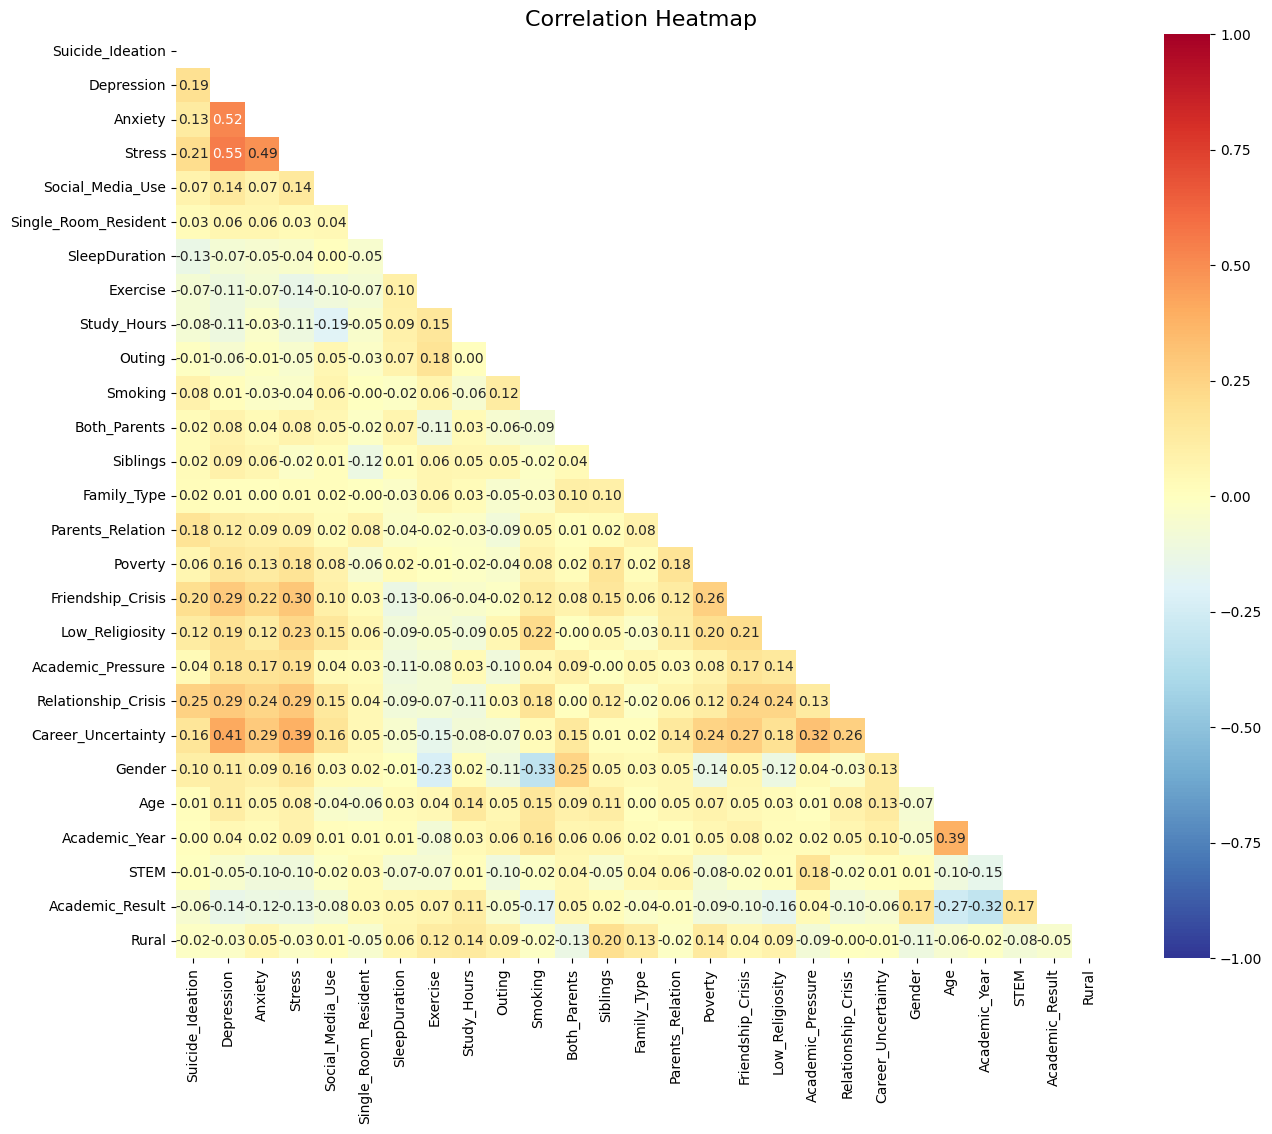

In [234]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select the relevant columns from the DataFrame
columns_to_select = [
    "Suicide_Ideation", "Depression", "Anxiety", "Stress",
    "Social_Media_Use", "Single_Room_Resident", "SleepDuration", "Exercise",
    "Study_Hours", "Outing", "Smoking", "Both_Parents", "Siblings",
    "Family_Type", "Parents_Relation", "Poverty", "Friendship_Crisis",
    "Low_Religiosity", "Academic_Pressure", "Relationship_Crisis",
    "Career_Uncertainty", "Gender", "Age", "Academic_Year", "STEM",
    "Academic_Result", "Rural"
]

# Create a subset of the dataframe with only the selected columns
df_subset = df_final[columns_to_select]

# Compute the correlation matrix (using Pearson by default)
corr_matrix = df_subset.corr()

# Create a mask for the upper triangle (upper half of the matrix)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap with an engaging color palette (e.g., RdYlBu_r)
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='RdYlBu_r', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


In [236]:
# Independent variables (Features)
X = df_final[[
    "Depression", "Anxiety", "Stress", "Social_Media_Use", "Internet_Use",
    "Single_Room_Resident", "SleepDuration", "Exercise", "Study_Hours", "Outing",
    "Smoking", "Both_Parents", "Siblings", "Family_Type", "Parents_Relation",
    "Poverty", "Friendship_Crisis", "Low_Religiosity", "Academic_Pressure",
    "Relationship_Crisis", "Career_Uncertainty", "Gender", "Age", "Academic_Year",
    "STEM", "Academic_Result", "Rural"
]]

# Dependent variable (Target)
Y = df_final['Suicide_Ideation']


In [237]:
from sklearn.model_selection import train_test_split
#Importing class to split and train dataset from sklearn
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [238]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.83
Confusion Matrix:
[[110   2]
 [ 21   4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.91       112
           1       0.67      0.16      0.26        25

    accuracy                           0.83       137
   macro avg       0.75      0.57      0.58       137
weighted avg       0.81      0.83      0.79       137



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**<h1> Model Fitness**



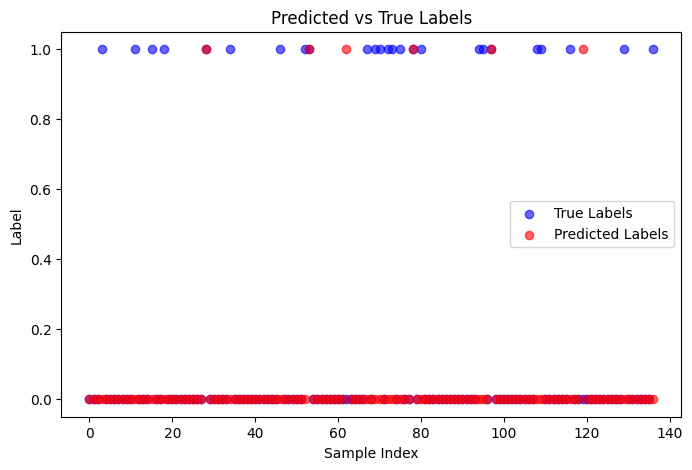

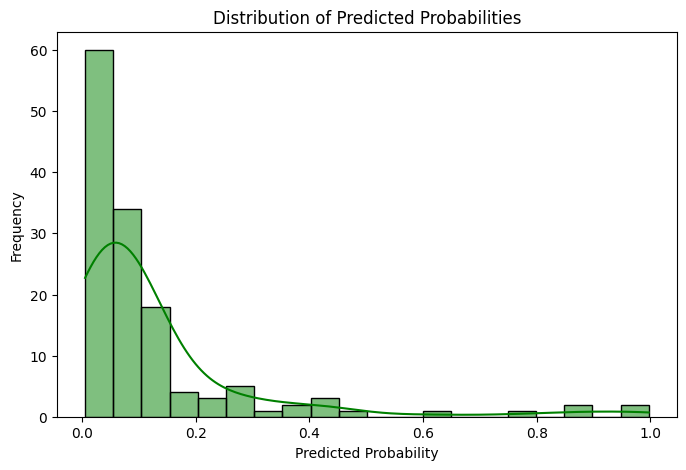

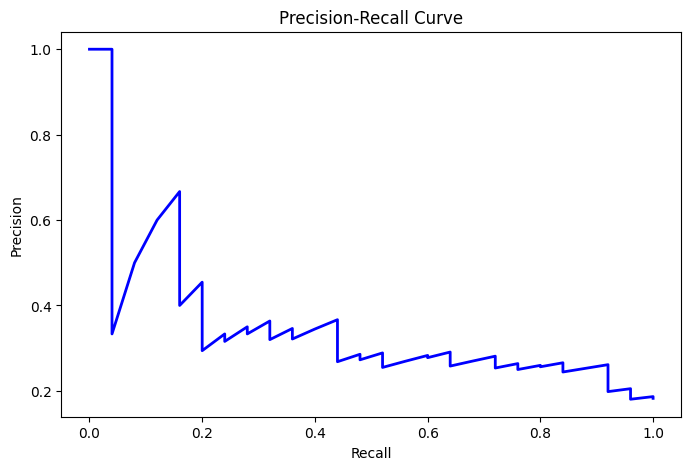

In [239]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import seaborn as sns

# 1. Predicted vs True Labels (Scatter Plot)
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='True Labels', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Labels', alpha=0.6)
plt.title('Predicted vs True Labels')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.legend()
plt.show()

# 2. Predicted Probabilities Distribution (Histogram)
plt.figure(figsize=(8, 5))
sns.histplot(y_pred_proba, kde=True, color='green', bins=20)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

# 3. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 5))
plt.plot(recall, precision, color='blue', lw=2)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


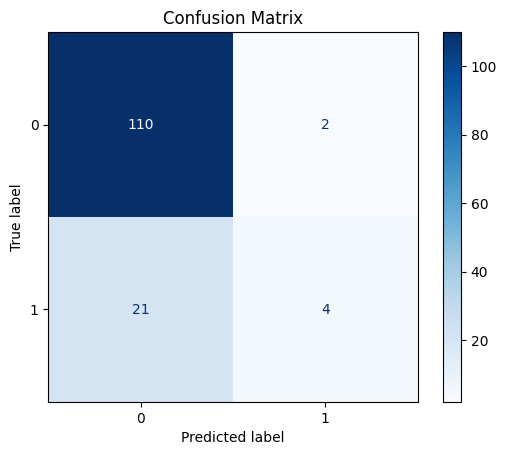

In [240]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', colorbar=True)

# Add a title and labels
plt.title("Confusion Matrix")
plt.show()

In [241]:
# Import necessary libraries
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.82
Confusion Matrix:
[[112   0]
 [ 25   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       112
           1       0.00      0.00      0.00        25

    accuracy                           0.82       137
   macro avg       0.41      0.50      0.45       137
weighted avg       0.67      0.82      0.74       137



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [242]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

# Ensure y_train is binary and has no missing values
y_train = y_train.astype(int)  # Convert to integer if not already
y_train = y_train.dropna()  # Drop any NaN values in y_train
X_train = X_train.loc[y_train.index]  # Ensure X_train matches y_train's index

# Add constant for intercept
X_train_sm = sm.add_constant(X_train)

# Fit logistic regression model using statsmodels (for p-values)
log_reg_sm = sm.Logit(y_train, X_train_sm)
result = log_reg_sm.fit()  # Fit the model

# Extract coefficients and p-values
coefficients = result.params[1:]  # Exclude intercept
p_values = result.pvalues[1:]  # Exclude intercept

# Create a DataFrame to hold the feature names, coefficients, and p-values
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients,
    'p-value': p_values
})

# Add a column to indicate if the coefficient is statistically significant (p-value < 0.05)
coef_df['Significance'] = coef_df['p-value'].apply(lambda x: 'Significant' if x < 0.05 else 'Non-Significant')

# Sort the coefficients in descending order for better visualization
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Plot the coefficients as a bar chart with different colors for significant and non-significant estimates
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, hue='Significance', palette={'Significant': 'green', 'Non-Significant': 'red'})
plt.title('Logistic Regression Coefficients with Significance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.legend(title='Significance')
plt.show()


ValueError: endog must be in the unit interval.

In [ ]:
# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', colorbar=True)

# Add a title and labels
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


In [ ]:
# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', colorbar=True)

# Add a title and labels
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Import necessary libraries
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,         # Number of boosting rounds
    max_depth=6,              # Maximum depth of a tree
    learning_rate=0.1,        # Step size shrinkage
    subsample=0.8,            # Subsample ratio of the training instance
    colsample_bytree=0.8,     # Subsample ratio of columns when constructing each tree
    random_state=42           # For reproducibility
)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

In [ ]:
# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', colorbar=True)

# Add a title and labels
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', colorbar=True)

# Add a title and labels
plt.title("Confusion Matrix")
plt.show()

In [ ]:
!pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier

In [ ]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, cohen_kappa_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input
from scikeras.wrappers import KerasClassifier

# Function to create a simple LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], 1)))  # Use Input explicitly
    model.add(LSTM(20))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Ensure the input data is reshaped for the LSTM model
X_train_rnn = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Initialize the LSTM classifier using KerasClassifier
lstm_classifier = KerasClassifier(model=create_lstm_model, epochs=20, batch_size=10, verbose=0)

# Train and evaluate the LSTM model
start_time = time.time()
lstm_classifier.fit(X_train_rnn, y_train)
y_pred = lstm_classifier.predict(X_test_rnn)
y_pred_proba = lstm_classifier.predict_proba(X_test_rnn)  # For binary, this is 1D

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_proba)  # Directly use 1D array
execution_time = time.time() - start_time

# Calculate specificity
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)  # For binary classification
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)

# Create a DataFrame to hold all the metrics and execution time
results_df = pd.DataFrame({
    'Model': ['LSTM'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'ROC-AUC': [roc_auc],
    'Specificity': [specificity],
    'Cohen_Kappa': [kappa],
    'Execution Time (s)': [execution_time]
})

print(results_df)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure metrics are scalar values for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Specificity', 'ROC-AUC', 'Cohen_Kappa']
values = [
    results_df['Accuracy'][0],
    results_df['Precision'][0],
    results_df['Recall'][0],
    results_df['F1 Score'][0],
    results_df['Specificity'][0],
    results_df['ROC-AUC'][0],
    results_df['Cohen_Kappa'][0]
]

# Bar Chart Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.ylabel('Score')
plt.title('LSTM Model Performance Metrics')
plt.ylim(0, 1.1)  # Limit to reflect percentage values
plt.xticks(rotation=45)
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, cohen_kappa_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier

# Function to create a simple ANN model
def create_ann_model():
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Initialize the ANN classifier
ann_classifier = KerasClassifier(model=create_ann_model, epochs=20, batch_size=10, verbose=0)

# Train and evaluate the ANN model
start_time = time.time()
ann_classifier.fit(X_train, y_train)
y_pred = ann_classifier.predict(X_test)
y_pred_proba = ann_classifier.predict_proba(X_test)  # 1D array for binary classification

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_proba)  # Use 1D array directly
execution_time = time.time() - start_time

# Calculate specificity
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)  # For binary classification
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)

# Create a DataFrame to hold all the metrics and execution time
results_df = pd.DataFrame({
    'Model': ['ANN'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'ROC-AUC': [roc_auc],
    'Specificity': [specificity],
    'Cohen_Kappa': [kappa],
    'Execution Time (s)': [execution_time]
})

print(results_df)


## <h1> **Confusion Matrix**



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


**<h1> ROC Curve**

In [ ]:
from sklearn.metrics import roc_curve

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


**<h1>Precision-Recall Curve**

In [ ]:
from sklearn.metrics import precision_recall_curve

# Calculate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()
plt.show()


**<h1> Metrics Comparison Bar Chart**

In [ ]:
# Plot histogram of predicted probabilities
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_proba, kde=True, bins=20, color='blue')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability of Positive Class')
plt.ylabel('Frequency')
plt.grid()
plt.show()

